<a href="https://colab.research.google.com/github/shubhu1026/AI-ML/blob/main/Kevares_Dataset_Setup.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
!pip install ultralytics

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 976.9/976.9 kB 23.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 363.4/363.4 MB 4.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.8/13.8 MB 114.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 24.6/24.6 MB 89.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 883.7/883.7 kB 58.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 664.8/664.8 MB 2.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 211.5/211.5 MB 5.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.3/56.3 MB 10.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 127.9/127.9 MB 8.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 207.5/207.5 MB 5.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 21.1/21.1 MB 63.1 MB/s eta 0:00:00
  Attempting uninstall: nvidia-nvjitlink-cu12
    Found existing installation: nvidia-nvjitlink-cu12 12.5.82
    Uninstal

Kevares New

In [ ]:
import zipfile

zip_file_path = '/content/drive/MyDrive/AI Capstone/Kevares Final.zip'
unzip_dir = '/content/Kevares Final/'

# Unzip the file
with zipfile.ZipFile(zip_file_path, 'r') as zip_ref:
    zip_ref.extractall(unzip_dir)

print("Files unzipped successfully!")

Files unzipped successfully!


### Class Mapping

In [ ]:
class_mapping = {
    "plastic trash": 0,
    "paper trash": 1,
    "cans": 2,
    "cigarette trash": 3
}

In [ ]:
class_distribution = {0: 0, 1: 0, 2: 0, 3: 0}

In [ ]:
import json
import os
from PIL import Image

def get_bounding_box(points):
    min_x = min([point[0] for point in points])
    max_x = max([point[0] for point in points])
    min_y = min([point[1] for point in points])
    max_y = max([point[1] for point in points])

    # YOLO format bounding box: center_x, center_y, width, height
    center_x = (min_x + max_x) / 2
    center_y = (min_y + max_y) / 2
    width = max_x - min_x
    height = max_y - min_y

    return center_x, center_y, width, height

def convert_json_to_yolo(json_file, image_path):
    with open(json_file, 'r') as f:
        data = json.load(f)

    yolo_format_labels = []

    for shape in data['shapes']:
        label = shape['label']
        points = shape['points']

        center_x, center_y, width, height = get_bounding_box(points)

        with Image.open(image_path) as img:
            image_width, image_height = img.size

        center_x /= image_width
        center_y /= image_height
        width /= image_width
        height /= image_height

        class_id = class_mapping.get(label, -1)
        if class_id == -1:
            print(f"Warning: Unknown class '{label}' in {json_file}. Skipping this label.")
            continue

        class_distribution[class_id] += 1
        yolo_format_labels.append(f"{class_id} {center_x} {center_y} {width} {height}")

    return yolo_format_labels

folder = '/content/Kevares Final/Kevares Final/'

output_folder = '/content/Kevares Final/yolo_labels/'
os.makedirs(output_folder, exist_ok=True)

for file_name in os.listdir(folder):
    if file_name.lower().endswith('.json'):
        json_path = os.path.join(folder, file_name)

        image_number = int(os.path.splitext(file_name)[0])

        print(f"Processing {file_name}, image number: {image_number}")

        if image_number <= 211:
            print(f"Processing {file_name} (image number {image_number} <= 211).")
            image_name = f"{image_number}.jpg"
            image_path = os.path.join(folder, image_name)

            if not os.path.exists(image_path):
                print(f"Warning: Image file {image_name} not found. Skipping {json_path}.")
                continue

            yolo_labels = convert_json_to_yolo(json_path, image_path)

            yolo_label_file = os.path.join(output_folder, os.path.splitext(file_name)[0] + '.txt')
            with open(yolo_label_file, 'w') as f:
                for label in yolo_labels:
                    f.write(label + '\n')

            print(f"Converted {file_name} to YOLO format.")

        else:
            print(f"Processing {file_name} (image number {image_number} > 211).")

            image_name = f"{image_number}.jpg"
            image_path = os.path.join(folder, image_name)

            if not os.path.exists(image_path):
                print(f"Warning: Image file {image_name} not found. Skipping {json_path}.")
                continue

            yolo_labels = convert_json_to_yolo(json_path, image_path)

            yolo_label_file = os.path.join(output_folder, os.path.splitext(file_name)[0] + '.txt')
            with open(yolo_label_file, 'w') as f:
                for label in yolo_labels:
                    f.write(label + '\n')

            print(f"Converted {file_name} to YOLO format for images over 211.")

print("All files have been successfully converted.")


Processing 238.json, image number: 238
Processing 238.json (image number 238 > 211).
Converted 238.json to YOLO format for images over 211.
Processing 15.json, image number: 15
Processing 15.json (image number 15 <= 211).
Converted 15.json to YOLO format.
Processing 259.json, image number: 259
Processing 259.json (image number 259 > 211).
Converted 259.json to YOLO format for images over 211.
Processing 96.json, image number: 96
Processing 96.json (image number 96 <= 211).
Converted 96.json to YOLO format.
Processing 142.json, image number: 142
Processing 142.json (image number 142 <= 211).
Converted 142.json to YOLO format.
Processing 61.json, image number: 61
Processing 61.json (image number 61 <= 211).
Converted 61.json to YOLO format.
Processing 235.json, image number: 235
Processing 235.json (image number 235 > 211).
Converted 235.json to YOLO format for images over 211.
Processing 367.json, image number: 367
Processing 367.json (image number 367 > 211).
Converted 367.json to YOLO

In [ ]:
import os

# Define the folder path
folder_path = '/content/Kevares Final/Kevares Final'  # Replace with the actual folder path

# Iterate over the files in the folder
for file_name in os.listdir(folder_path):
    # Check if the file is a .json file
    if file_name.lower().endswith('.json'):
        file_path = os.path.join(folder_path, file_name)

        # Delete the file
        os.remove(file_path)
        print(f"Deleted: {file_name}")

print("All .json files have been deleted.")

Deleted: 238.json
Deleted: 15.json
Deleted: 259.json
Deleted: 96.json
Deleted: 142.json
Deleted: 61.json
Deleted: 235.json
Deleted: 367.json
Deleted: 214.json
Deleted: 247.json
Deleted: 78.json
Deleted: 121.json
Deleted: 270.json
Deleted: 329.json
Deleted: 98.json
Deleted: 92.json
Deleted: 154.json
Deleted: 396.json
Deleted: 297.json
Deleted: 388.json
Deleted: 151.json
Deleted: 326.json
Deleted: 126.json
Deleted: 287.json
Deleted: 189.json
Deleted: 234.json
Deleted: 364.json
Deleted: 220.json
Deleted: 201.json
Deleted: 18.json
Deleted: 5.json
Deleted: 208.json
Deleted: 129.json
Deleted: 232.json
Deleted: 102.json
Deleted: 249.json
Deleted: 225.json
Deleted: 295.json
Deleted: 338.json
Deleted: 228.json
Deleted: 65.json
Deleted: 32.json
Deleted: 173.json
Deleted: 216.json
Deleted: 110.json
Deleted: 114.json
Deleted: 313.json
Deleted: 236.json
Deleted: 181.json
Deleted: 227.json
Deleted: 339.json
Deleted: 9.json
Deleted: 317.json
Deleted: 39.json
Deleted: 100.json
Deleted: 243.json
Delete

In [ ]:
print("\nClass distribution:")
for class_id, count in class_distribution.items():
    class_name = list(class_mapping.keys())[list(class_mapping.values()).index(class_id)]
    print(f"{class_name}: {count}")


Class distribution:
plastic trash: 276
paper trash: 259
cans: 61
cigarette trash: 244


In [ ]:
import os
import cv2
import random
import matplotlib.pyplot as plt
import matplotlib.patches as patches

def plot_sample_bboxes_TACO(image_dir, label_dir, num_samples=5):
    """
    Randomly selects a few images and plots their bounding boxes.

    Args:
    - image_dir (str): Path to the directory containing images.
    - label_dir (str): Path to the directory containing YOLO bbox labels.
    - num_samples (int): Number of images to display.

    Returns:
    - None (Displays images with bounding boxes)
    """
    # Get list of label files
    label_files = [f for f in os.listdir(label_dir) if f.endswith(".txt")]

    # Randomly select a few label files
    selected_labels = random.sample(label_files, min(num_samples, len(label_files)))

    for label_file in selected_labels:
        label_path = os.path.join(label_dir, label_file)
        image_path = os.path.join(image_dir, label_file.replace(".txt", ".jpg"))  # Assuming images are .jpg

        # Skip if image does not exist
        if not os.path.exists(image_path):
            print(f"Skipping {label_file}: Image not found")
            continue

        # Load image
        image = cv2.imread(image_path)
        image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)  # Convert BGR to RGB for Matplotlib

        # Read bounding boxes
        with open(label_path, "r") as file:
            lines = file.readlines()

        h, w, _ = image.shape  # Get image dimensions

        # Plot image
        fig, ax = plt.subplots(1, figsize=(8, 6))
        ax.imshow(image)

        for line in lines:
            parts = line.strip().split()
            class_id = int(float(parts[0]))  # Convert from float string to int
            x_center, y_center, bbox_width, bbox_height = map(float, parts[1:])

            # Convert YOLO format to pixel values
            x_min = int((x_center - bbox_width / 2) * w)
            y_min = int((y_center - bbox_height / 2) * h)
            bbox_width = int(bbox_width * w)
            bbox_height = int(bbox_height * h)

            # Draw bounding box
            rect = patches.Rectangle(
                (x_min, y_min), bbox_width, bbox_height,
                linewidth=2, edgecolor='red', facecolor='none'
            )
            ax.add_patch(rect)
            ax.text(x_min, y_min - 5, f"Class {class_id}", color='red', fontsize=10, backgroundcolor='white')

        # Show the image with bounding boxes
        plt.axis("off")
        plt.show()

# Example usage:
# plot_sample_bboxes_TACO("/content/Kevares Final/Kevares Final", "/content/Kevares Final/yolo_labels", num_samples=10)

In [ ]:
import os

old_name = "/content/Kevares Final/Kevares Final"
new_name = "/content/Kevares Final/Images"

os.rename(old_name, new_name)


old_name = "/content/Kevares Final/yolo_labels"
new_name = "/content/Kevares Final/Labels"

os.rename(old_name, new_name)

In [ ]:
import zipfile

zip_file_path = '/content/drive/MyDrive/AI Capstone/dataset.zip'
unzip_dir = '/content/Kevares Final/'

# Unzip the file
with zipfile.ZipFile(zip_file_path, 'r') as zip_ref:
    zip_ref.extractall(unzip_dir)

print("Files unzipped successfully!")

In [ ]:
import shutil
import os

# Source and destination folders
source_folder = "/content/Kevares Final/labels/all"
destination_folder = "/content/Kevares Final/Labels"

# Ensure the destination folder exists
os.makedirs(destination_folder, exist_ok=True)

# Move all files from source to destination
for filename in os.listdir(source_folder):
    src_path = os.path.join(source_folder, filename)
    dest_path = os.path.join(destination_folder, filename)

    # Move the file
    shutil.move(src_path, dest_path)
    print(f"Moved: {src_path} → {dest_path}")

print("✅ All files moved successfully!")


In [ ]:
import shutil

# Path to the folder you want to zip
folder_path = '/content/Kevares Final/'

# Path where you want to save the zip file
zip_path = '/content/Kevares_Final_New.zip'

# Create a zip file
shutil.make_archive(zip_path.replace('.zip', ''), 'zip', folder_path)

print(f"Folder '{folder_path}' has been zipped as '{zip_path}'")


In [ ]:
# zip_path = "/content/Kevares_Final_New.zip"

# drive_dest = "/content/drive/My Drive/AI Capstone/"

# shutil.move(zip_path, drive_dest)
# print(f"✅ Zip file saved to Google Drive: {drive_dest}")

In [ ]:
import os

# Define paths
labels_dir = "/content/Kevares Final/Labels"

class_distribution = {0: 0, 1: 0, 2: 0, 3: 0}

# Loop through all label files
for label_file in os.listdir(labels_dir):
    label_path = os.path.join(labels_dir, label_file)

    # Open and read label file
    with open(label_path, "r") as file:
        lines = file.readlines()

    # Process each line (YOLO format: class_id x_center y_center width height)
    for line in lines:
        class_id = int(line.split()[0])  # Extract class ID
        if class_id in class_distribution:
            class_distribution[class_id] += 1

# Print class distribution
print("Class Distribution:")
for class_name, class_id in class_mapping.items():
    print(f"{class_name}: {class_distribution[class_id]} occurrences")

Dataset is done

In [ ]:
import zipfile

zip_file_path = '/content/drive/MyDrive/AI Capstone/Kevares_Final_New.zip'
unzip_dir = '/content/Kevares/'

# Unzip the file
with zipfile.ZipFile(zip_file_path, 'r') as zip_ref:
    zip_ref.extractall(unzip_dir)

print("Files unzipped successfully!")

In [ ]:
import os
import random

# Set your input image and label folders
image_folder = "/content/Kevares/Images"
label_folder = "/content/Kevares/Labels"

# Step 1: Get all images with empty label files
empty_label_images = []

for filename in os.listdir(image_folder):
    if filename.endswith(".jpg") or filename.endswith(".png"):
        label_file = os.path.join(label_folder, filename.replace('.jpg', '.txt').replace('.png', '.txt'))

        # Check if label file exists and is empty
        if not os.path.exists(label_file) or os.path.getsize(label_file) == 0:
            empty_label_images.append(filename)

# Step 2: Select 66 images randomly from the empty label list
images_to_keep = random.sample(empty_label_images, 66)

# Step 3: Delete the rest of the images with empty label files
for image in empty_label_images:
    if image not in images_to_keep:
        image_path = os.path.join(image_folder, image)
        label_path = os.path.join(label_folder, image.replace('.jpg', '.txt').replace('.png', '.txt'))

        # Delete image and label
        os.remove(image_path)
        if os.path.exists(label_path):
            os.remove(label_path)

print("Deleted the rest of the images with empty labels.")


In [ ]:
import os

# Specify the directory path
directory_path = '/content/Kevares/Images'

# Count the number of files in the directory
file_count = len([f for f in os.listdir(directory_path) if os.path.isfile(os.path.join(directory_path, f))])

print(f"Number of files in the directory: {file_count}")

Number of files in the directory: 659


In [ ]:
import os

# Define paths
labels_dir = "/content/Kevares/Labels"

class_mapping = {
    "plastic trash": 0,
    "paper trash": 1,
    "cans": 2,
    "cigarette trash": 3
}

class_distribution = {0: 0, 1: 0, 2: 0, 3: 0}

# Loop through all label files
for label_file in os.listdir(labels_dir):
    label_path = os.path.join(labels_dir, label_file)

    # Open and read label file
    with open(label_path, "r") as file:
        lines = file.readlines()

    # Process each line (YOLO format: class_id x_center y_center width height)
    for line in lines:
        class_id = int(line.split()[0])  # Extract class ID
        if class_id in class_distribution:
            class_distribution[class_id] += 1

# Print class distribution
print("Class Distribution:")
for class_name, class_id in class_mapping.items():
    print(f"{class_name}: {class_distribution[class_id]} occurrences")

Class Distribution:
plastic trash: 276 occurrences
paper trash: 556 occurrences
cans: 61 occurrences
cigarette trash: 386 occurrences


In [ ]:
import shutil

shutil.rmtree('/content/Kevares Final')

In [ ]:
!pip install albumentations

In [ ]:
import os
import cv2
import numpy as np
import albumentations as A
from albumentations.pytorch import ToTensorV2
import torch

# Function to read YOLO annotations
def read_yolo_labels(label_file):
    with open(label_file, 'r') as f:
        lines = f.readlines()
    boxes = []
    for line in lines:
        label_data = list(map(float, line.strip().split()))
        boxes.append(label_data)
    return np.array(boxes)

# Function to write YOLO annotations
def write_yolo_labels(label_file, boxes):
    with open(label_file, 'w') as f:
        for box in boxes:
            f.write(" ".join(map(str, box)) + "\n")

# Apply augmentation to an image and its corresponding YOLO labels
def augment_image_and_labels(image, labels, augmentations):
    # Ensure labels is a NumPy array
    labels = np.array(labels, dtype=np.float32)

    # If no labels exist, return the image without modification
    if labels.size == 0:
        return image, labels

    # Apply augmentation
    augmented = augmentations(image=image, bboxes=labels[:, 1:], class_labels=labels[:, 0])

    # Extract augmented results
    augmented_image = augmented['image']
    augmented_bboxes = np.array(augmented['bboxes'])

    # Return augmented image & labels
    return augmented_image, np.column_stack((augmented['class_labels'], augmented_bboxes))

# Define your augmentation pipeline
augmentation_pipeline = A.Compose([
    A.HorizontalFlip(p=0.5),                # Random horizontal flip
    A.RandomRotate90(p=0.5),                # Random 90-degree rotation (good for different orientations)
    A.RandomBrightnessContrast(p=0.2),      # Random brightness/contrast adjustment
    A.RandomGamma(p=0.2),                   # Random gamma adjustment to handle varying lighting conditions
    A.RandomScale(p=0.2),                   # Random scaling of the image
    A.ShiftScaleRotate(shift_limit=0.1, scale_limit=0.1, rotate_limit=20, p=0.5), # Shift, scale, and rotate
    A.Resize(256, 256),                     # Resize to a fixed size (256x256 in this case)
    A.RandomCrop(width=224, height=224, p=0.5),  # Random crop to simulate occlusions
    A.ElasticTransform(alpha=1, sigma=50, p=0.2),  # Elastic distortion (helps model generalize better)
    A.Perspective(p=0.3),                  # Perspective transformation for variation in viewpoints
    A.MotionBlur(p=0.2),                   # Motion blur to simulate real-world noise
    A.GaussNoise(p=0.2),                   # Gaussian noise to improve robustness
    A.CLAHE(p=0.1, clip_limit=(1, 4)),      # CLAHE for contrast enhancement (improves visibility of small objects)
    A.HueSaturationValue(hue_shift_limit=20, sat_shift_limit=30, val_shift_limit=20, p=0.3),  # Color shifting
    A.Affine(scale=(0.8, 1.2), translate_percent=(0.1, 0.2), p=0.4),  # Scaling and translation
    ToTensorV2(),                          # Convert to PyTorch tensors
], bbox_params=A.BboxParams(format='yolo', label_fields=['class_labels']))

# Set up your input and output folders
input_image_folder = "/content/Kevares/Images"
input_label_folder = "/content/Kevares/Labels"
output_image_folder = "/content/Kevares/Augmented_Images"
output_label_folder = "/content/Kevares/Augmented_Labels"

os.makedirs(output_image_folder, exist_ok=True)
os.makedirs(output_label_folder, exist_ok=True)

# Define how many times you want to augment each image
augmentation_factor = 5  # Change this to 10 for 10x augmentation

# Iterate over your images and labels
for filename in os.listdir(input_image_folder):
    if filename.endswith(".jpg") or filename.endswith(".png"):
        # Get the corresponding label file
        label_file = os.path.join(input_label_folder, filename.replace('.jpg', '.txt').replace('.png', '.txt'))

        if os.path.exists(label_file):
            image_path = os.path.join(input_image_folder, filename)
            image = cv2.imread(image_path)

            # Read the YOLO annotations
            labels = read_yolo_labels(label_file)

            # Perform augmentations
            # Perform augmentations
            for i in range(augmentation_factor):
                augmented_image, augmented_labels = augment_image_and_labels(image, labels, augmentation_pipeline)

                # Check if the augmented image is a PyTorch tensor or a NumPy array
                if isinstance(augmented_image, torch.Tensor):
                    # If it's a tensor, convert it to a NumPy array
                    augmented_image = augmented_image.permute(1, 2, 0).cpu().numpy().astype(np.uint8)
                elif isinstance(augmented_image, np.ndarray):
                    # If it's already a NumPy array, just convert to uint8
                    augmented_image = augmented_image.astype(np.uint8)

                # Save the augmented image
                augmented_image_path = os.path.join(output_image_folder, f"{filename.replace('.jpg', '')}_aug{i}.jpg")
                cv2.imwrite(augmented_image_path, augmented_image)

                # Save the updated YOLO labels
                augmented_label_file = os.path.join(output_label_folder, f"{filename.replace('.jpg', '')}_aug{i}.txt")
                write_yolo_labels(augmented_label_file, augmented_labels)

print("Augmentation process completed.")


/usr/local/lib/python3.11/dist-packages/albumentations/core/validation.py:87: UserWarning: ShiftScaleRotate is a special case of Affine transform. Please use Affine transform instead.
  original_init(self, **validated_kwargs)


Augmentation process completed.


In [ ]:
directory_path = '/content/Kevares/Augmented_Images'

files = [f for f in os.listdir(directory_path) if os.path.isfile(os.path.join(directory_path, f))]

# Get the number of files
num_files = len(files)

print(f'Number of files in the directory: {num_files}')

Number of files in the directory: 3295


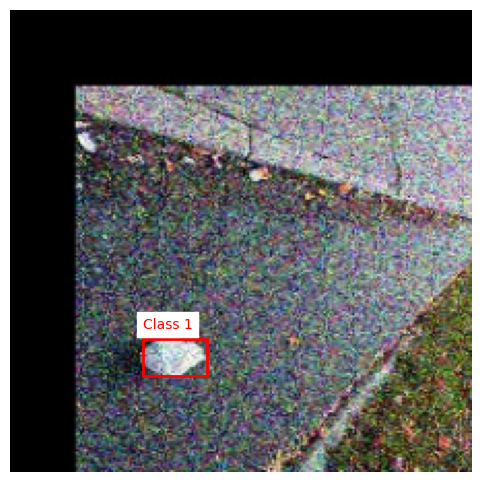

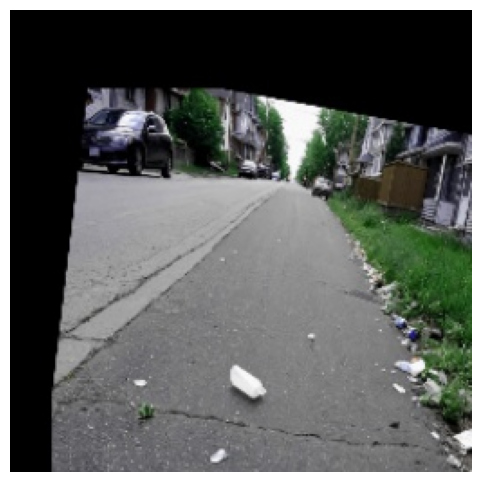

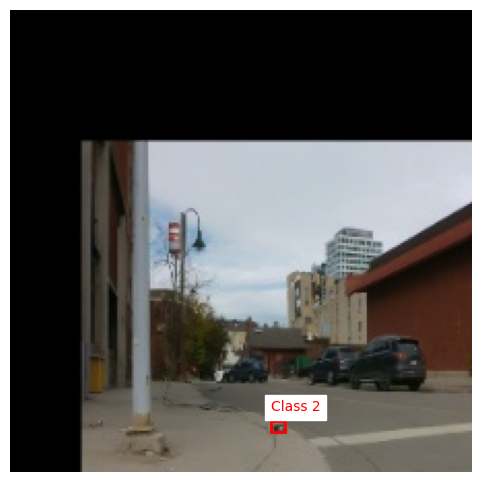

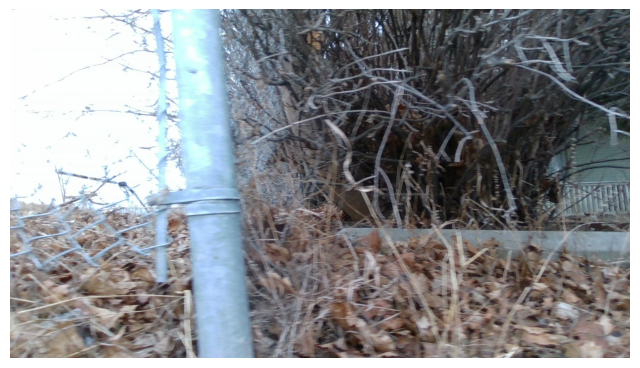

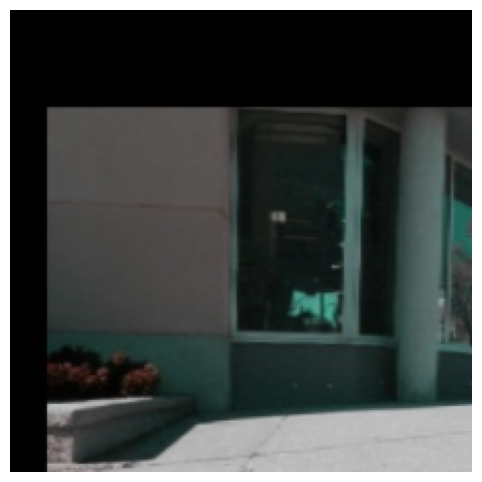

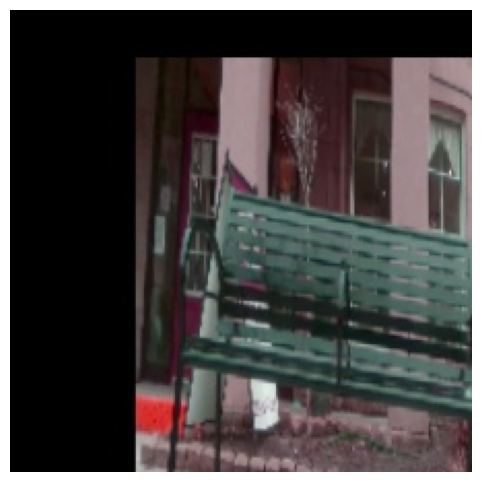

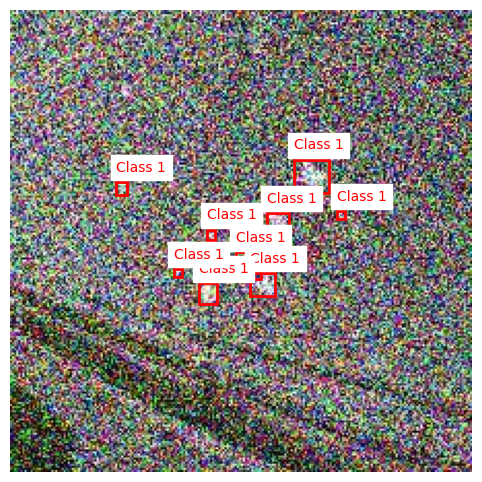

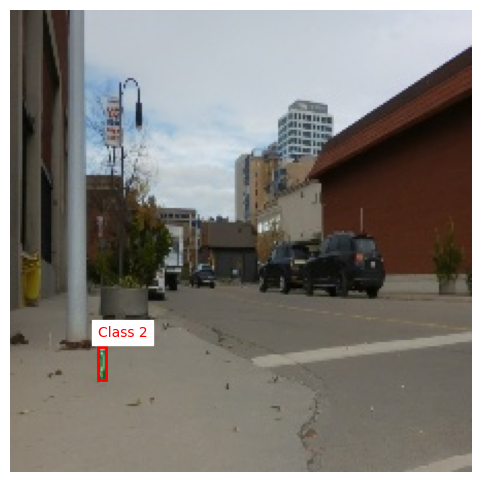

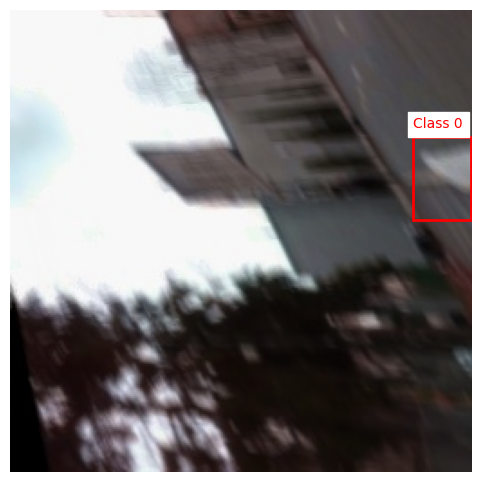

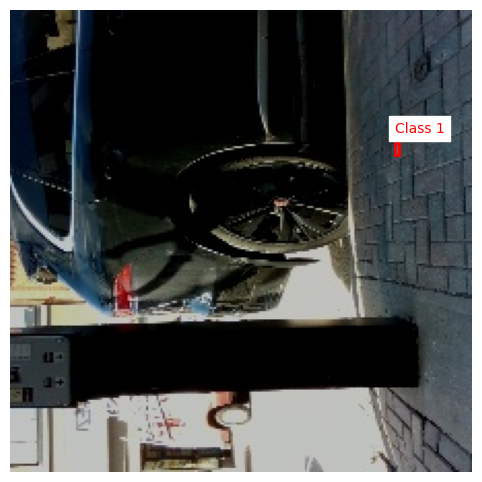

In [ ]:
plot_sample_bboxes_TACO("/content/Kevares/Augmented_Images", "/content/Kevares/Augmented_Labels", num_samples=10)

In [ ]:
# import shutil

# shutil.rmtree('/content/Kevares')

In [ ]:
import os

# Directories for images and labels
image_folder = "/content/Kevares/Augmented_Images"
label_folder = "/content/Kevares/Augmented_Labels"

# Iterate over images in the image folder
for filename in os.listdir(image_folder):
    if filename.endswith(".jpg") or filename.endswith(".png"):
        # Create the corresponding label file path
        label_file = os.path.join(label_folder, filename.replace('.jpg', '.txt').replace('.png', '.txt'))

        # If the label file doesn't exist, create an empty one
        if not os.path.exists(label_file):
            with open(label_file, 'w') as f:
                pass  # Just create an empty label file

print("Empty label files for images without corresponding labels have been created.")

Empty label files for images without corresponding labels have been created.


In [ ]:
import os
import shutil
import random

# Paths to the original dataset
images_dir = "/content/Kevares/Augmented_Images"
labels_dir = "/content/Kevares/Augmented_Labels"

# Paths for the new structured dataset
train_images_dir = "/content/Kevares new/images/train"
val_images_dir = "/content/Kevares new/images/val"
train_labels_dir = "/content/Kevares new/labels/train"
val_labels_dir = "/content/Kevares new/labels/val"

# Create the necessary directories
os.makedirs(train_images_dir, exist_ok=True)
os.makedirs(val_images_dir, exist_ok=True)
os.makedirs(train_labels_dir, exist_ok=True)
os.makedirs(val_labels_dir, exist_ok=True)

# List all image files
image_files = [f for f in os.listdir(images_dir) if f.endswith(('.jpg', '.png'))]

# Shuffle the image files for random split
random.shuffle(image_files)

# Split 80% for training and 20% for validation
split_ratio = 0.8
train_size = int(len(image_files) * split_ratio)
train_files = image_files[:train_size]
val_files = image_files[train_size:]

# Move images and labels for training set
for image_file in train_files:
    label_file = image_file.replace('.jpg', '.txt').replace('.png', '.txt')
    shutil.move(os.path.join(images_dir, image_file), os.path.join(train_images_dir, image_file))
    shutil.move(os.path.join(labels_dir, label_file), os.path.join(train_labels_dir, label_file))

# Move images and labels for validation set
for image_file in val_files:
    label_file = image_file.replace('.jpg', '.txt').replace('.png', '.txt')
    shutil.move(os.path.join(images_dir, image_file), os.path.join(val_images_dir, image_file))
    shutil.move(os.path.join(labels_dir, label_file), os.path.join(val_labels_dir, label_file))

print(f"Training images: {len(train_files)}")
print(f"Validation images: {len(val_files)}")


Training images: 2636
Validation images: 659


In [ ]:
import os

# Define paths to the image directories
train_images_dir = "/content/Kevares new/images/train"
val_images_dir = "/content/Kevares new/images/val"

# Define the number of classes and class names
classes = ['plastic trash', 'paper trash', 'cans', 'cigarette trash']
num_classes = len(classes)

# Path to save the dataset.yaml file
yaml_file_path = "/content/Kevares new/dataset.yaml"

# Create the dataset.yaml content
yaml_content = f"""
train: {train_images_dir}  # Path to training images
val: {val_images_dir}      # Path to validation images

# Number of classes
nc: {num_classes}

# Class names
names:
"""
for i, class_name in enumerate(classes):
    yaml_content += f"  {i}: '{class_name}'\n"

# Write the YAML content to the file
with open(yaml_file_path, 'w') as f:
    f.write(yaml_content)

print(f"Dataset YAML file created at: {yaml_file_path}")

Dataset YAML file created at: /content/Kevares new/dataset.yaml


In [ ]:
!pip install ultralytics

In [ ]:
from ultralytics import YOLO

# Load a pretrained YOLO model
model = YOLO("/content/best.pt")

In [ ]:
results = model.train(
    data="/content/Kevares new/dataset.yaml",
    epochs=50,
    patience=5,
    lr0=0.00001,
    freeze=10,
    save=True,
)

Ultralytics 8.3.99 🚀 Python-3.11.11 torch-2.6.0+cu124 CUDA:0 (Tesla T4, 15095MiB)
engine/trainer: task=detect, mode=train, model=/content/best.pt, data=/content/Kevares new/dataset.yaml, epochs=50, time=None, patience=5, batch=16, imgsz=640, save=True, save_period=-1, cache=False, device=None, workers=8, project=None, name=train2, exist_ok=False, pretrained=True, optimizer=auto, verbose=True, seed=0, deterministic=True, single_cls=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, amp=True, fraction=1.0, profile=False, freeze=10, multi_scale=False, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, split=val, save_json=False, save_hybrid=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, vid_stride=1, stream_buffer=False, visualize=False, augment=False, agnostic_nms=False, classes=None, retina_masks=False, embed=None, show=False, save_frames=False, save_txt=False, save_conf=False, save_crop=False, show_labels=True, show_conf=True, 

train: Scanning /content/Kevares new/labels/train.cache... 1569 images, 1188 backgrounds, 0 corrupt: 100%|██████████| 2636/2636 [00:00<?, ?it/s]

albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01, num_output_channels=3, method='weighted_average'), CLAHE(p=0.01, clip_limit=(1.0, 4.0), tile_grid_size=(8, 8))



val: Scanning /content/Kevares new/labels/val.cache... 386 images, 308 backgrounds, 0 corrupt: 100%|██████████| 659/659 [00:00<?, ?it/s]


Plotting labels to runs/detect/train2/labels.jpg... 
optimizer: 'optimizer=auto' found, ignoring 'lr0=1e-05' and 'momentum=0.937' and determining best 'optimizer', 'lr0' and 'momentum' automatically... 
optimizer: AdamW(lr=0.00125, momentum=0.9) with parameter groups 81 weight(decay=0.0), 88 weight(decay=0.0005), 87 bias(decay=0.0)
TensorBoard: model graph visualization added ✅
Image sizes 640 train, 640 val
Using 2 dataloader workers
Logging results to runs/detect/train2
Starting training for 50 epochs...

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       1/50       1.6G      1.917      4.235      1.547          8        640: 100%|██████████| 165/165 [00:47<00:00,  3.48it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 21/21 [00:04<00:00,  4.22it/s]

                   all        659        717      0.428      0.309      0.275      0.144



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       2/50       1.6G      1.839      3.023      1.486         22        640: 100%|██████████| 165/165 [00:44<00:00,  3.70it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 21/21 [00:06<00:00,  3.32it/s]

                   all        659        717      0.417      0.316      0.286      0.139



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       3/50       1.6G      1.859       2.62      1.553         12        640: 100%|██████████| 165/165 [00:43<00:00,  3.79it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 21/21 [00:04<00:00,  4.37it/s]

                   all        659        717      0.432      0.264      0.269      0.142



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       4/50       1.6G       1.86      2.387      1.536         20        640: 100%|██████████| 165/165 [00:43<00:00,  3.81it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 21/21 [00:06<00:00,  3.34it/s]

                   all        659        717      0.419      0.359      0.314      0.156



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       5/50       1.6G      1.802      2.229      1.521         20        640: 100%|██████████| 165/165 [00:44<00:00,  3.74it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 21/21 [00:04<00:00,  4.52it/s]


                   all        659        717      0.463      0.352      0.345      0.177

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       6/50       1.6G      1.774      2.129      1.514         11        640: 100%|██████████| 165/165 [00:44<00:00,  3.74it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 21/21 [00:06<00:00,  3.45it/s]

                   all        659        717      0.538      0.396      0.397      0.203



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       7/50       1.6G       1.76      2.034      1.497         20        640: 100%|██████████| 165/165 [00:45<00:00,  3.65it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 21/21 [00:04<00:00,  4.45it/s]

                   all        659        717      0.522      0.353      0.368       0.19



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       8/50       1.6G       1.75      1.996      1.503         13        640: 100%|██████████| 165/165 [00:47<00:00,  3.50it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 21/21 [00:07<00:00,  2.75it/s]

                   all        659        717      0.463      0.379      0.386      0.203



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       9/50       1.6G      1.729      1.987      1.493         24        640: 100%|██████████| 165/165 [00:43<00:00,  3.76it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 21/21 [00:04<00:00,  4.39it/s]

                   all        659        717      0.571      0.376      0.416      0.225



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      10/50       1.6G      1.713      1.852      1.476         17        640: 100%|██████████| 165/165 [00:43<00:00,  3.78it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 21/21 [00:06<00:00,  3.30it/s]


                   all        659        717      0.458      0.393      0.393      0.211

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      11/50       1.6G      1.675      1.856      1.453         23        640: 100%|██████████| 165/165 [00:43<00:00,  3.78it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 21/21 [00:04<00:00,  4.36it/s]

                   all        659        717      0.545      0.429      0.424      0.236



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      12/50       1.6G      1.635      1.763      1.433         25        640: 100%|██████████| 165/165 [00:44<00:00,  3.68it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 21/21 [00:06<00:00,  3.33it/s]

                   all        659        717      0.586      0.419      0.459       0.26



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      13/50       1.6G      1.662      1.815      1.461         16        640: 100%|██████████| 165/165 [00:46<00:00,  3.58it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 21/21 [00:04<00:00,  4.48it/s]

                   all        659        717      0.492      0.411      0.387      0.212



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      14/50       1.6G      1.625      1.698       1.43         18        640: 100%|██████████| 165/165 [00:43<00:00,  3.78it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 21/21 [00:06<00:00,  3.28it/s]


                   all        659        717      0.515      0.458      0.436       0.24

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      15/50       1.6G      1.645      1.722      1.449         21        640: 100%|██████████| 165/165 [00:45<00:00,  3.64it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 21/21 [00:04<00:00,  4.31it/s]


                   all        659        717      0.573      0.414      0.437      0.233

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      16/50       1.6G      1.613      1.681      1.434         19        640: 100%|██████████| 165/165 [00:45<00:00,  3.61it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 21/21 [00:05<00:00,  3.52it/s]

                   all        659        717      0.549      0.446      0.462      0.263



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      17/50       1.6G      1.619      1.665      1.413         30        640: 100%|██████████| 165/165 [00:43<00:00,  3.77it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 21/21 [00:04<00:00,  4.47it/s]


                   all        659        717      0.618      0.444      0.476      0.259

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      18/50       1.6G      1.606      1.637      1.422         15        640: 100%|██████████| 165/165 [00:44<00:00,  3.71it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 21/21 [00:06<00:00,  3.23it/s]


                   all        659        717      0.646      0.433      0.483       0.27

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      19/50       1.6G       1.57      1.611      1.401         21        640: 100%|██████████| 165/165 [00:43<00:00,  3.78it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 21/21 [00:04<00:00,  4.46it/s]


                   all        659        717      0.542      0.466      0.476      0.269

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      20/50       1.6G       1.56      1.567      1.388         10        640: 100%|██████████| 165/165 [00:43<00:00,  3.77it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 21/21 [00:06<00:00,  3.29it/s]

                   all        659        717       0.65       0.48      0.503      0.279



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      21/50       1.6G      1.545      1.519      1.366         14        640: 100%|██████████| 165/165 [00:43<00:00,  3.80it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 21/21 [00:04<00:00,  4.43it/s]


                   all        659        717      0.668       0.44      0.493      0.267

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      22/50       1.6G      1.539      1.505      1.385         20        640: 100%|██████████| 165/165 [00:46<00:00,  3.58it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 21/21 [00:05<00:00,  3.86it/s]

                   all        659        717      0.689      0.401      0.479      0.263



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      23/50       1.6G      1.534      1.506      1.359         17        640: 100%|██████████| 165/165 [00:44<00:00,  3.70it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 21/21 [00:05<00:00,  4.10it/s]

                   all        659        717      0.625      0.492      0.508      0.287



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      24/50       1.6G      1.511      1.472      1.365         10        640: 100%|██████████| 165/165 [00:45<00:00,  3.61it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 21/21 [00:04<00:00,  4.44it/s]

                   all        659        717      0.593      0.463      0.492      0.284



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      25/50       1.6G      1.515      1.482      1.379         15        640: 100%|██████████| 165/165 [00:44<00:00,  3.75it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 21/21 [00:05<00:00,  3.54it/s]

                   all        659        717      0.698      0.468      0.523      0.297



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      26/50       1.6G      1.499      1.459      1.356          9        640: 100%|██████████| 165/165 [00:44<00:00,  3.67it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 21/21 [00:04<00:00,  4.50it/s]

                   all        659        717       0.61      0.496      0.517      0.286



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      27/50       1.6G      1.487       1.39      1.341         18        640: 100%|██████████| 165/165 [00:44<00:00,  3.71it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 21/21 [00:06<00:00,  3.38it/s]

                   all        659        717       0.65      0.465      0.518      0.293



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      28/50       1.6G      1.481        1.4      1.337         15        640: 100%|██████████| 165/165 [00:45<00:00,  3.66it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 21/21 [00:04<00:00,  4.57it/s]

                   all        659        717      0.679      0.501      0.529      0.302



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      29/50       1.6G      1.458       1.38      1.327         23        640: 100%|██████████| 165/165 [00:44<00:00,  3.69it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 21/21 [00:05<00:00,  3.77it/s]

                   all        659        717      0.638      0.478      0.517      0.287



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      30/50       1.6G      1.458      1.359      1.321         28        640: 100%|██████████| 165/165 [00:44<00:00,  3.75it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 21/21 [00:05<00:00,  4.13it/s]

                   all        659        717      0.685      0.475      0.527      0.296



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      31/50       1.6G      1.456      1.346      1.329         12        640: 100%|██████████| 165/165 [00:44<00:00,  3.69it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 21/21 [00:04<00:00,  4.52it/s]

                   all        659        717      0.651      0.512      0.535      0.306



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      32/50       1.6G       1.45      1.323      1.318         16        640: 100%|██████████| 165/165 [00:44<00:00,  3.73it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 21/21 [00:05<00:00,  3.56it/s]

                   all        659        717      0.641      0.505      0.536      0.307



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      33/50       1.6G      1.414      1.275      1.318         11        640: 100%|██████████| 165/165 [00:43<00:00,  3.79it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 21/21 [00:04<00:00,  4.50it/s]

                   all        659        717      0.737      0.472       0.54      0.293



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      34/50       1.6G      1.423      1.327      1.319         19        640: 100%|██████████| 165/165 [00:44<00:00,  3.74it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 21/21 [00:05<00:00,  3.56it/s]

                   all        659        717      0.633       0.51       0.54      0.298



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      35/50       1.6G       1.39      1.248      1.289         14        640: 100%|██████████| 165/165 [00:43<00:00,  3.79it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 21/21 [00:04<00:00,  4.58it/s]

                   all        659        717      0.667      0.497       0.55      0.304



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      36/50       1.6G       1.39      1.255      1.292         13        640: 100%|██████████| 165/165 [00:44<00:00,  3.71it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 21/21 [00:06<00:00,  3.50it/s]

                   all        659        717      0.697      0.504      0.542      0.292



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      37/50       1.6G      1.409      1.277      1.294         20        640: 100%|██████████| 165/165 [00:43<00:00,  3.77it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 21/21 [00:04<00:00,  4.46it/s]

                   all        659        717      0.678      0.509      0.544      0.305
EarlyStopping: Training stopped early as no improvement observed in last 5 epochs. Best results observed at epoch 32, best model saved as best.pt.
To update EarlyStopping(patience=5) pass a new patience value, i.e. `patience=300` or use `patience=0` to disable EarlyStopping.



37 epochs completed in 0.520 hours.
Optimizer stripped from runs/detect/train2/weights/last.pt, 5.5MB
Optimizer stripped from runs/detect/train2/weights/best.pt, 5.5MB

Validating runs/detect/train2/weights/best.pt...
Ultralytics 8.3.99 🚀 Python-3.11.11 torch-2.6.0+cu124 CUDA:0 (Tesla T4, 15095MiB)
YOLO11n summary (fused): 100 layers, 2,582,932 parameters, 0 gradients, 6.3 GFLOPs


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 21/21 [00:09<00:00,  2.18it/s]


                   all        659        717      0.641      0.505      0.536      0.306
         plastic trash        171        229      0.676      0.502       0.58      0.322
           paper trash        131        200      0.686      0.547      0.603      0.362
                  cans         53         62      0.693      0.661       0.65      0.405
       cigarette trash         53        226      0.507       0.31      0.312      0.137
Speed: 0.3ms preprocess, 3.4ms inference, 0.0ms loss, 3.1ms postprocess per image
Results saved to runs/detect/train2


In [ ]:
results = model.val()

Ultralytics 8.3.99 🚀 Python-3.11.11 torch-2.6.0+cu124 CUDA:0 (Tesla T4, 15095MiB)
YOLO11n summary (fused): 100 layers, 2,582,932 parameters, 0 gradients, 6.3 GFLOPs


val: Scanning /content/Kevares new/labels/val.cache... 386 images, 308 backgrounds, 0 corrupt: 100%|██████████| 659/659 [00:00<?, ?it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 42/42 [00:06<00:00,  6.72it/s]


                   all        659        717      0.641      0.505      0.536      0.305
         plastic trash        171        229      0.667      0.498      0.574      0.321
           paper trash        131        200      0.687      0.548      0.603       0.36
                  cans         53         62      0.691      0.661       0.65      0.405
       cigarette trash         53        226      0.522      0.314      0.315      0.136
Speed: 1.0ms preprocess, 4.3ms inference, 0.0ms loss, 1.4ms postprocess per image
Results saved to runs/detect/train22


In [ ]:
import os
import matplotlib.pyplot as plt
from PIL import Image
import numpy as np

paths2=[]
for dirname, _, filenames in os.walk('/content/runs/detect/train22'):
    for filename in filenames:
        if filename[-4:]=='.jpg' or filename[-4:]=='.png':
            paths2+=[(os.path.join(dirname, filename))]
paths2=sorted(paths2)

print(paths2)

for path in paths2:
    image = Image.open(path)
    image=np.array(image)
    plt.figure(figsize=(20,10))
    plt.imshow(image)
    plt.show()

In [ ]:
res = model.predict(source="/content/Kevares Final/Images/104.jpg")

In [ ]:
import cv2
import matplotlib.pyplot as plt
from matplotlib.patches import Rectangle

# Assuming you already have the model's prediction result in `res`
# Extract the prediction details (bbox, class, confidence)
pred = res[0].boxes
labels = pred.cls
confidences = pred.conf
boxes = pred.xywh

# Load the image
img_path = "/content/Kevares Final/Images/104.jpg"
img = cv2.imread(img_path)

# Convert the image from BGR (OpenCV) to RGB (Matplotlib)
img_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

# Create a plot
fig, ax = plt.subplots(1, figsize=(12, 8))

# Display the image
ax.imshow(img_rgb)

# Loop through the detections and plot them
for i in range(len(labels)):
    # Extract the bounding box and class info
    x, y, w, h = boxes[i]  # xywh format
    class_id = int(labels[i].item())  # class id
    confidence = confidences[i].item()  # confidence score

    # Convert from relative coordinates to image coordinates
    height, width, _ = img.shape
    x1, y1 = int((x - w / 2) * width), int((y - h / 2) * height)
    x2, y2 = int((x + w / 2) * width), int((y + h / 2) * height)

    # Get the class label (you may need a mapping of class ID to labels)
    class_label = "Plastic trash"  # Replace with actual class names or mapping

    # Create a Rectangle patch
    rect = Rectangle((x1, y1), x2 - x1, y2 - y1, linewidth=2, edgecolor='r', facecolor='none')
    ax.add_patch(rect)

    # Add label and confidence text
    ax.text(x1, y1 - 10, f'{class_label} {confidence:.2f}', color='red', fontsize=12, weight='bold')

# Show the plot with the bounding boxes and labels
plt.axis('off')
plt.show()


In [ ]:
!pip install ultralytics

In [ ]:
from ultralytics import YOLO

# Load a model
model = YOLO("/content/best (6).pt")

In [ ]:
results = model("/content/right_1707415217.png", show_boxes=True, show_labels=True, show_conf=True)

In [ ]:
from PIL import Image

for i, r in enumerate(results):
    # Plot results image
    im_bgr = r.plot()  # BGR-order numpy array
    im_rgb = Image.fromarray(im_bgr[..., ::-1])  # RGB-order PIL image

    # Show results to screen (in supported environments)
    r.show()

    # Save results to disk
    r.save(filename=f"results{i}.jpg")